# Explore here

In [1]:

import pandas as pd
import requests
import io
import urllib3
import matplotlib.pyplot as plt
import seaborn as sns

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
response = requests.get(url, verify=False)

dataframe = pd.read_csv(io.StringIO(response.text), sep=",")

print(f"Columnas detectadas: {len(dataframe.columns)}")
dataframe.head(2)

Columnas detectadas: 1


,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5


--- Evaluación Inicial (k=5) ---
Accuracy: 0.55
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.68      0.63       130
           6       0.51      0.55      0.53       132
           7       0.54      0.36      0.43        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.27      0.26      0.26       320
weighted avg       0.52      0.55      0.53       320



/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

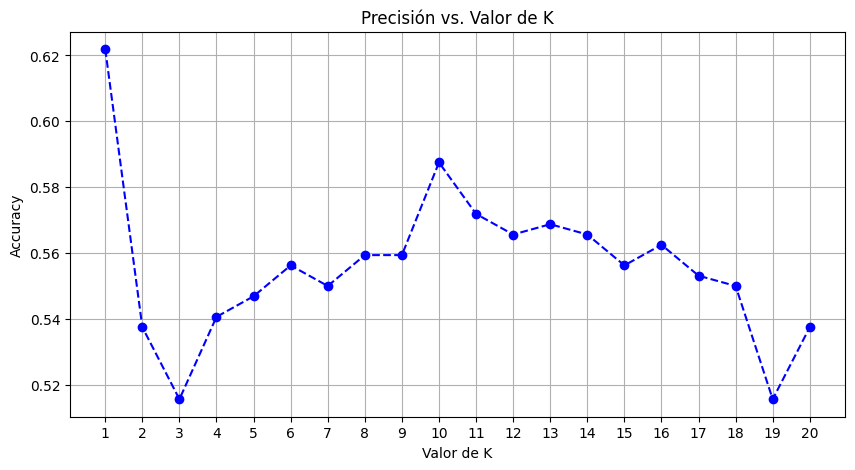

In [11]:
import pandas as pd
import requests
import io
import urllib3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
response = requests.get(url, verify=False)

dataframe = pd.read_csv(io.StringIO(response.text), sep=";")

X = dataframe.drop("quality", axis=1) 
y = dataframe["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("--- Evaluación Inicial (k=5) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

accuracies = []
range_k = range(1, 21)

for k in range_k:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_val_pred))

plt.figure(figsize=(10, 5))
plt.plot(range_k, accuracies, marker='o', linestyle='--', color='b')
plt.title('Precisión vs. Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Accuracy')
plt.xticks(range_k)
plt.grid(True)
plt.show()